In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
# Import raw data
data = 'test'
raw_df = pd.read_csv(f'../rawData/{data}.csv') 

In [94]:
# All columns that contains at least 1 NA
col_na = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
           'GarageQual', 'GarageFinish', 'GarageYrBlt', 'GarageType', 'GarageCond',
           'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
           'MasVnrArea', 'MasVnrType', 'Electrical']

In [95]:
raw_df = raw_df.drop(columns = ['PoolQC', 'MiscFeature', 'Alley'])
clean_df = raw_df.copy()

# Formatting

- Continuous features remains unchanged
- Ordinal categorical features has int labels
- Non ordinal categorical features are dummified

In [96]:
contin = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal']

ord_cat = ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'HouseStyle',
           'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
           'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
           'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'BsmtFullBath',
           'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
           'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
           'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual',
           'GarageCond', 'Fence', 'MoSold', 'YrSold']

cat = ['MSSubClass', 'MSZoning', 'Street', 'LotConfig', 'Neighborhood',
      'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl',
      'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 
      'CentralAir', 'Electrical', 'GarageType', 'PavedDrive',
      'SaleType', 'SaleCondition']

## Ordinal categorical

In [97]:
mapping1 = {np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
mapping2 = {np.nan:0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
mapping3 = {np.nan:0, 'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4}
mapping4 = {np.nan:0, 'Lvl':1, 'Bnk':2, 'HLS':3, 'Low':4}
mapping5 = {np.nan:0, 'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}
mapping6 = {'Gtl':1, 'Mod':2, 'Sev':3}
mapping7 = {np.nan:0, '1Story':1, '1.5Unf':2, '1.5Fin':3, '2Story':4, '2.5Unf':5, '2.5Fin':6,
           'SFoyer':7, 'SLvl':8}
mapping8 = {np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
mapping9 = {np.nan:0, 'Typ':1, 'Min1':2, 'Min2':3, 'Mod':4, 'Maj1':5, 'Maj2':6,
            'Sev':7, 'Sal':8}
mapping10 = {np.nan:0, 'Unf':1, 'RFn':2, 'Fin':3}
mapping11 = {np.nan:0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}

In [98]:
clean_df['LotShape'] = [mapping3[val] for val in raw_df['LotShape']]
clean_df['LandContour'] = [mapping4[val] for val in raw_df['LandContour']]
clean_df['Utilities'] = [mapping5[val] for val in raw_df['Utilities']]
clean_df['BsmtExposure'] = [mapping2[val] for val in raw_df['BsmtExposure']]
clean_df['Functional'] = [mapping9[val] for val in raw_df['Functional']]
clean_df['GarageFinish'] = [mapping10[val] for val in raw_df['GarageFinish']]
clean_df['Fence'] = [mapping11[val] for val in raw_df['Fence']]
clean_df['LandSlope'] = [mapping6[val] for val in raw_df['LandSlope']]
clean_df['HouseStyle'] = [mapping7[val] for val in raw_df['HouseStyle']]

tmpCol = ['ExterQual', 'BsmtQual', 'BsmtCond', 'ExterCond', 'BsmtQual', 'BsmtCond',
         'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']
for col in tmpCol :
    try:
        clean_df[col] = [mapping1[val] for val in raw_df[col]]
    except:
        print(col)

tmpCol = ['BsmtFinType1', 'BsmtFinType2']
for col in tmpCol :
    clean_df[col] = [mapping8[val] for val in raw_df[col]]

In [101]:
clean_df.to_csv(f'./{data}_NotDum.csv')

## Non ordinal categorical

In [92]:
# Dummification
for col in cat :
    tmp_dum = pd.get_dummies(clean_df[col])
    tmp_dum.columns = [f'{col}.{lvl}' for lvl in tmp_dum.columns]
    clean_df = pd.concat([clean_df.drop(columns = col), tmp_dum], sort = False, axis = 1)

# Imputing NA

## Continuous features

In [99]:
# Only LotFrontage has missing value

# dict neighborhood : median(LotFrontage)
dict_neigh = raw_df.groupby(by = 'Neighborhood').agg({'LotFrontage':'median'}).to_dict()

clean_df.loc[clean_df['LotFrontage'].isna(), 'LotFrontage'] = list(map(lambda n : dict_neigh['LotFrontage'][n], 
                                                                        raw_df.loc[raw_df['LotFrontage'].isna()]['Neighborhood']))

## NA for GarageYrBlt and MasVnrArea

In [100]:
# Imputing year built if garage year built is NA
clean_df.loc[clean_df['GarageYrBlt'].isna(), 'GarageYrBlt'] = clean_df.loc[clean_df['GarageYrBlt'].isna()]['YearBuilt']
clean_df.loc[clean_df['MasVnrArea'].isna(), 'MasVnrArea'] = 0

# Feature selection

## Feature selection with lasso

- Lasso with log price : most of the features are vanishing near alpha = 0
- Lasso with price per square foot : same behavior
- Lasso with SalePrice : seem much more usable for selecting features.

In [316]:
from sklearn.linear_model import Lasso

X, y = clean_df.loc[:, clean_df.columns != 'SalePrice'], clean_df['SalePrice']

y_log = np.log(y) # log price
y_PxSqF = y/X['GrLivArea'] # price per square foot

lasso = Lasso(max_iter=1000)

coeffs = []
intercepts = []

alpha_range = np.linspace(1e-3, 1000,100)

for alpha in alpha_range:
    lasso.set_params(alpha=alpha)
    lasso.fit(X, y)
    coeffs.append(lasso.coef_)
    intercepts.append(lasso.intercept_)

/home/dantole/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371355551736.9032, tolerance: 920791133.4609975
  positive)
/home/dantole/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2718026597.3171387, tolerance: 920791133.4609975
  positive)
/home/dantole/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112362378856.39404, tolerance: 920791133.4609975
  positive)
/home/dantole/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase t

Text(0.5, 1.0, 'Change of Lasso Intercept Varying Alpha')

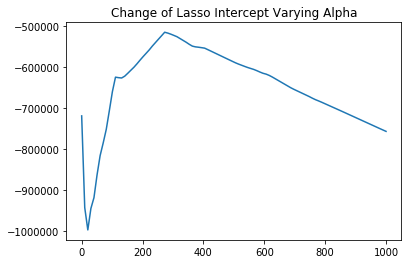

In [317]:
plt.plot(alpha_range, intercepts)
plt.title('Change of Lasso Intercept Varying Alpha')

Text(0.5, 1.0, 'Change of Lasso Slopes Varying Alpha')

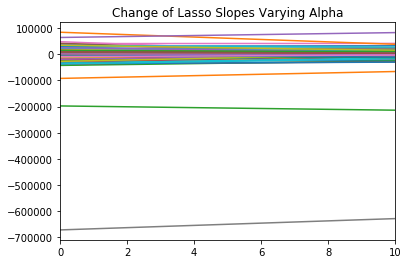

In [318]:
coeffs = pd.DataFrame(np.array(coeffs), columns=X.columns)

for name in coeffs.columns:
    plt.plot(alpha_range, coeffs[name], label=name)

plt.axis(xmin = 0, xmax = 10)
# plt.legend(loc=1)
plt.title('Change of Lasso Slopes Varying Alpha')

In [319]:
np.abs(coeffs).iloc[-1,].sort_values(ascending=False).head(50)

OverallQual             13049.492437
BldgType.1Fam           10151.676279
Neighborhood.NridgHt     7409.836829
ExterQual                7398.492339
KitchenQual              7256.516363
BsmtExposure             5793.650494
Condition1.Norm          4294.526427
MasVnrType.BrkFace       3146.308902
OverallCond              3100.980890
SaleType.New             2816.945393
BsmtQual                 2813.019488
Functional               2807.616791
HouseStyle               2698.338912
FireplaceQu              1910.212665
BedroomAbvGr             1822.446894
GarageCond               1446.970769
TotRmsAbvGrd             1286.171040
GarageCars               1125.168578
BsmtFinType1             1071.977207
HeatingQC                 646.942814
YearBuilt                 310.159815
YearRemodAdd               98.735715
GarageYrBlt                81.280300
LotFrontage                56.310455
ScreenPorch                53.394762
1stFlrSF                   52.710271
2ndFlrSF                   44.969597
G

## Drop repeated information

In [24]:
raw_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Pushing clean data

In [25]:
clean_df.to_csv(f'./{data}_cleaned.csv', index=False)